In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from sklearn.model_selection import train_test_split
import json

import glob
import random
import collections
from glob import glob
import numpy as np
import pandas as pd

#import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.utils import shuffle

from skimage.io import imread
from skimage.transform import resize
from keras import layers
from keras import models
import keras
from keras.layers import LeakyReLU
from keras.models import Sequential, Model, load_model
from keras.layers import Input, Conv1D, Conv2D, MaxPooling1D, MaxPooling2D, Dense, Dropout, Activation, Flatten
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import shutil
import keras
from PIL import Image
#import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import keras
import json
import tensorflow as tf 
from keras.layers import Input
from keras import Sequential
from keras.layers import Dense, LSTM,Flatten, TimeDistributed, Conv2D, Dropout
from keras.applications.inception_v3 import InceptionV3
from keras.applications.vgg16 import VGG16
import tensorflow_datasets as tfds
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import re
import string

from keras.models import load_model
from keras.callbacks import Callback,ModelCheckpoint
from keras.models import Sequential,load_model
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
import keras.backend as K
import numpy as np
import pandas as pd

from skimage.io import imread
from skimage.transform import resize
from keras import layers
from keras import models
import keras
from keras.layers import LeakyReLU
from keras.models import Sequential, Model, load_model
from keras.layers import Input, Conv1D,Reshape, Conv2D, MaxPooling1D, MaxPooling2D, Dense, Dropout, Activation, Flatten, UpSampling2D
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import numpy as np
import pandas as pd

from skimage.io import imread
from skimage.transform import resize
from keras import layers
from keras import models
import keras
from keras.layers import LeakyReLU
from keras.models import Sequential, Model, load_model
from keras.layers import Input, Conv1D, Conv2D, MaxPooling1D, MaxPooling2D, Dense, Dropout, Activation, Flatten
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from keras.callbacks import Callback,ModelCheckpoint
from keras.models import Sequential,load_model
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
import keras.backend as K

import tensorflow as tf
import tensorflow_addons as tfa
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers
from tensorflow.keras import regularizers
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.layers import Lambda, Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras import Input
from keras.layers import TimeDistributed, Conv2D, Dense, MaxPooling2D, Flatten, LSTM, Dropout, BatchNormalization
from keras import models
AUTO = tf.data.AUTOTUNE
from sklearn.metrics import confusion_matrix
import random

AUTO = tf.data.AUTOTUNE
BATCH_SIZE = 32
EPOCHS = 50
CROP_TO = 32
SEED = 26

PROJECT_DIM = 128
LATENT_DIM = 512
WEIGHT_DECAY = 0.0005
learning_rate = 0.0001
batch_size = 128
hidden_units = 512
projection_units = 256
num_epochs = 2
dropout_rate = 0.5

temperature = 0.05

C:\Users\chowd\AppData\Roaming\Python\Python39\site-packages\tensorflow_addons\utils\ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.9.0 and strictly below 2.12.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.7.0 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure you're using a tested and supported configuration, either change the TensorFlow version or the TensorFlow Addons's version. 
You can find the compatibility matrix in TensorFlow Addon's readme:
https://github.com/tensorflow/addons
  warnings.warn(


In [2]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"


In [3]:
#os.environ["TF_GPU_THREAD_MODE"] = "gpu_private"

import tensorflow as tf  # framework
from tensorflow import keras  # for tf.keras
import tensorflow_addons as tfa  # LAMB optimizer and gaussian_blur_2d function
import numpy as np  # np.random.random
import matplotlib.pyplot as plt  # graphs
import datetime  # tensorboard logs naming

# XLA optimization for faster performance(up to 10-15 minutes total time saved)
#tf.config.optimizer.set_jit(True)

In [13]:
[
    (train_features, train_labels),
    (test_features, test_labels),
] = keras.datasets.cifar10.load_data()

train_features = train_features / 255.0
test_features = test_features / 255.0

BATCH_SIZE = 16
# Width and height of image
IMAGE_SIZE = 32

In [14]:
class Augmentation(keras.layers.Layer):
    """Base augmentation class.

    Base augmentation class. Contains the random_execute method.

    Methods:
        random_execute: method that returns true or false based
          on a probability. Used to determine whether an augmentation
          will be run.
    """

    def __init__(self):
        super().__init__()

    @tf.function
    def random_execute(self, prob: float) -> bool:
        """random_execute function.

        Arguments:
            prob: a float value from 0-1 that determines the
              probability.

        Returns:
            returns true or false based on the probability.
        """

        return tf.random.uniform([], minval=0, maxval=1) < prob


class RandomToGrayscale(Augmentation):
    """RandomToGrayscale class.

    RandomToGrayscale class. Randomly makes an image
    grayscaled based on the random_execute method. There
    is a 20% chance that an image will be grayscaled.

    Methods:
        call: method that grayscales an image 20% of
          the time.
    """

    @tf.function
    def call(self, x: tf.Tensor) -> tf.Tensor:
        """call function.

        Arguments:
            x: a tf.Tensor representing the image.

        Returns:
            returns a grayscaled version of the image 20% of the time
              and the original image 80% of the time.
        """

        if self.random_execute(0.2):
            x = tf.image.rgb_to_grayscale(x)
            x = tf.tile(x, [1, 1, 3])
        return x


class RandomColorJitter(Augmentation):
    """RandomColorJitter class.

    RandomColorJitter class. Randomly adds color jitter to an image.
    Color jitter means to add random brightness, contrast,
    saturation, and hue to an image. There is a 80% chance that an
    image will be randomly color-jittered.

    Methods:
        call: method that color-jitters an image 80% of
          the time.
    """

    @tf.function
    def call(self, x: tf.Tensor) -> tf.Tensor:
        """call function.

        Adds color jitter to image, including:
          Brightness change by a max-delta of 0.8
          Contrast change by a max-delta of 0.8
          Saturation change by a max-delta of 0.8
          Hue change by a max-delta of 0.2
        Originally, the same deltas of the original paper
        were used, but a performance boost of almost 2% was found
        when doubling them.

        Arguments:
            x: a tf.Tensor representing the image.

        Returns:
            returns a color-jittered version of the image 80% of the time
              and the original image 20% of the time.
        """

        if self.random_execute(0.8):
            x = tf.image.random_brightness(x, 0.8)
            x = tf.image.random_contrast(x, 0.4, 1.6)
            x = tf.image.random_saturation(x, 0.4, 1.6)
            x = tf.image.random_hue(x, 0.2)
        return x


class RandomFlip(Augmentation):
    """RandomFlip class.

    RandomFlip class. Randomly flips image horizontally. There is a 50%
    chance that an image will be randomly flipped.

    Methods:
        call: method that flips an image 50% of
          the time.
    """

    @tf.function
    def call(self, x: tf.Tensor) -> tf.Tensor:
        """call function.

        Randomly flips the image.

        Arguments:
            x: a tf.Tensor representing the image.

        Returns:
            returns a flipped version of the image 50% of the time
              and the original image 50% of the time.
        """

        if self.random_execute(0.5):
            x = tf.image.random_flip_left_right(x)
        return x


class RandomResizedCrop(Augmentation):
    """RandomResizedCrop class.

    RandomResizedCrop class. Randomly crop an image to a random size,
    then resize the image back to the original size.

    Attributes:
        image_size: The dimension of the image

    Methods:
        __call__: method that does random resize crop to the image.
    """

    def __init__(self, image_size):
        super().__init__()
        self.image_size = image_size

    def call(self, x: tf.Tensor) -> tf.Tensor:
        """call function.

        Does random resize crop by randomly cropping an image to a random
        size 75% - 100% the size of the image. Then resizes it.

        Arguments:
            x: a tf.Tensor representing the image.

        Returns:
            returns a randomly cropped image.
        """

        rand_size = tf.random.uniform(
            shape=[],
            minval=int(0.75 * self.image_size),
            maxval=1 * self.image_size,
            dtype=tf.int32,
        )

        crop = tf.image.random_crop(x, (rand_size, rand_size, 3))
        crop_resize = tf.image.resize(crop, (self.image_size, self.image_size))
        return crop_resize


class RandomSolarize(Augmentation):
    """RandomSolarize class.

    RandomSolarize class. Randomly solarizes an image.
    Solarization is when pixels accidentally flip to an inverted state.

    Methods:
        call: method that does random solarization 20% of the time.
    """

    @tf.function
    def call(self, x: tf.Tensor) -> tf.Tensor:
        """call function.

        Randomly solarizes the image.

        Arguments:
            x: a tf.Tensor representing the image.

        Returns:
            returns a solarized version of the image 20% of the time
              and the original image 80% of the time.
        """

        if self.random_execute(0.2):
            # flips abnormally low pixels to abnormally high pixels
            x = tf.where(x < 10, x, 255 - x)
        return x


class RandomBlur(Augmentation):
    """RandomBlur class.

    RandomBlur class. Randomly blurs an image.

    Methods:
        call: method that does random blur 20% of the time.
    """

    @tf.function
    def call(self, x: tf.Tensor) -> tf.Tensor:
        """call function.

        Randomly solarizes the image.

        Arguments:
            x: a tf.Tensor representing the image.

        Returns:
            returns a blurred version of the image 20% of the time
              and the original image 80% of the time.
        """

        if self.random_execute(0.2):
            s = np.random.random()
            return tfa.image.gaussian_filter2d(image=x, sigma=s)
        return x


class RandomAugmentor(keras.Model):
    """RandomAugmentor class.

    RandomAugmentor class. Chains all the augmentations into
    one pipeline.

    Attributes:
        image_size: An integer represing the width and height
          of the image. Designed to be used for square images.
        random_resized_crop: Instance variable representing the
          RandomResizedCrop layer.
        random_flip: Instance variable representing the
          RandomFlip layer.
        random_color_jitter: Instance variable representing the
          RandomColorJitter layer.
        random_blur: Instance variable representing the
          RandomBlur layer
        random_to_grayscale: Instance variable representing the
          RandomToGrayscale layer
        random_solarize: Instance variable representing the
          RandomSolarize layer

    Methods:
        call: chains layers in pipeline together
    """

    def __init__(self, image_size: int):
        super().__init__()

        self.image_size = image_size
        self.random_resized_crop = RandomResizedCrop(image_size)
        self.random_flip = RandomFlip()
        self.random_color_jitter = RandomColorJitter()
        self.random_blur = RandomBlur()
        self.random_to_grayscale = RandomToGrayscale()
        self.random_solarize = RandomSolarize()

    def call(self, x: tf.Tensor) -> tf.Tensor:
        x = self.random_resized_crop(x)
        x = self.random_flip(x)
        x = self.random_color_jitter(x)
        x = self.random_blur(x)
        x = self.random_to_grayscale(x)
        x = self.random_solarize(x)

        x = tf.clip_by_value(x, 0, 1)
        return x


bt_augmentor = RandomAugmentor(IMAGE_SIZE)

In [6]:
class BTDatasetCreator:
    """Barlow twins dataset creator class.

    BTDatasetCreator class. Responsible for creating the
    barlow twins' dataset.

    Attributes:
        options: tf.data.Options needed to configure a setting
          that may improve performance.
        seed: random seed for shuffling. Used to synchronize two
          augmented versions.
        augmentor: augmentor used for augmentation.

    Methods:
        __call__: creates barlow dataset.
        augmented_version: creates 1 half of the dataset.
    """

    def __init__(self, augmentor: RandomAugmentor, seed: int = 1024):
        self.options = tf.data.Options()
        self.options.threading.max_intra_op_parallelism = 1
        self.seed = seed
        self.augmentor = augmentor

    def augmented_version(self, ds: list) -> tf.data.Dataset:
        return (
            tf.data.Dataset.from_tensor_slices(ds)
            .shuffle(1000, seed=self.seed)
            .map(self.augmentor, num_parallel_calls=tf.data.AUTOTUNE)
            .batch(BATCH_SIZE, drop_remainder=True)
            .prefetch(tf.data.AUTOTUNE)
            .with_options(self.options)
        )

    def __call__(self, ds: list) -> tf.data.Dataset:
        a1 = self.augmented_version(ds)
        a2 = self.augmented_version(ds)

        return tf.data.Dataset.zip((a1, a2)).with_options(self.options)


augment_versions = BTDatasetCreator(bt_augmentor)(train_features)

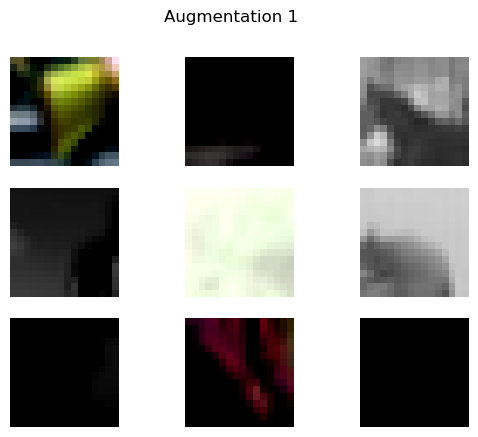

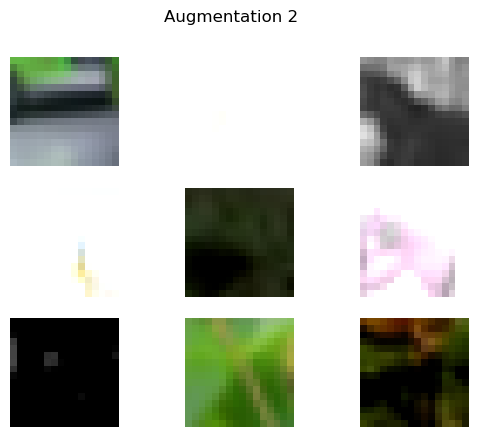

In [7]:
sample_augment_versions = iter(augment_versions)


def plot_values(batch: tuple):
    fig, axs = plt.subplots(3, 3)
    fig1, axs1 = plt.subplots(3, 3)

    fig.suptitle("Augmentation 1")
    fig1.suptitle("Augmentation 2")

    a1, a2 = batch

    # plots images on both tables
    for i in range(3):
        for j in range(3):
            # CHANGE(add / 255)
            axs[i][j].imshow(a1[3 * i + j])
            axs[i][j].axis("off")
            axs1[i][j].imshow(a2[3 * i + j])
            axs1[i][j].axis("off")

    plt.show()


plot_values(next(sample_augment_versions))

In [8]:
class BarlowLoss(keras.losses.Loss):
    """BarlowLoss class.

    BarlowLoss class. Creates a loss function based on the cross-correlation
    matrix.

    Attributes:
        batch_size: the batch size of the dataset
        lambda_amt: the value for lambda(used in cross_corr_matrix_loss)

    Methods:
        __init__: gets instance variables
        call: gets the loss based on the cross-correlation matrix
          make_diag_zeros: Used in calculating off-diagonal section
          of loss function; makes diagonals zeros.
        cross_corr_matrix_loss: creates loss based on cross correlation
          matrix.
    """

    def __init__(self, batch_size: int):
        """__init__ method.

        Gets the instance variables

        Arguments:
            batch_size: An integer value representing the batch size of the
              dataset. Used for cross correlation matrix calculation.
        """

        super().__init__()
        self.lambda_amt = 5e-3
        self.batch_size = batch_size

    def get_off_diag(self, c: tf.Tensor) -> tf.Tensor:
        """get_off_diag method.

        Makes the diagonals of the cross correlation matrix zeros.
        This is used in the off-diagonal portion of the loss function,
        where we take the squares of the off-diagonal values and sum them.

        Arguments:
            c: A tf.tensor that represents the cross correlation
              matrix

        Returns:
            Returns a tf.tensor which represents the cross correlation
            matrix with its diagonals as zeros.
        """

        zero_diag = tf.zeros(c.shape[-1])
        return tf.linalg.set_diag(c, zero_diag)

    def cross_corr_matrix_loss(self, c: tf.Tensor) -> tf.Tensor:
        """cross_corr_matrix_loss method.

        Gets the loss based on the cross correlation matrix.
        We want the diagonals to be 1's and everything else to be
        zeros to show that the two augmented images are similar.

        Loss function procedure:
        take the diagonal of the cross-correlation matrix, subtract by 1,
        and square that value so no negatives.

        Take the off-diagonal of the cc-matrix(see get_off_diag()),
        square those values to get rid of negatives and increase the value,
        and multiply it by a lambda to weight it such that it is of equal
        value to the optimizer as the diagonal(there are more values off-diag
        then on-diag)

        Take the sum of the first and second parts and then sum them together.

        Arguments:
            c: A tf.tensor that represents the cross correlation
              matrix

        Returns:
            Returns a tf.tensor which represents the cross correlation
            matrix with its diagonals as zeros.
        """

        # subtracts diagonals by one and squares them(first part)
        c_diff = tf.pow(tf.linalg.diag_part(c) - 1, 2)

        # takes off diagonal, squares it, multiplies with lambda(second part)
        off_diag = tf.pow(self.get_off_diag(c), 2) * self.lambda_amt

        # sum first and second parts together
        loss = tf.reduce_sum(c_diff) + tf.reduce_sum(off_diag)

        return loss

    def normalize(self, output: tf.Tensor) -> tf.Tensor:
        """normalize method.

        Normalizes the model prediction.

        Arguments:
            output: the model prediction.

        Returns:
            Returns a normalized version of the model prediction.
        """

        return (output - tf.reduce_mean(output, axis=0)) / tf.math.reduce_std(
            output, axis=0
        )

    def cross_corr_matrix(self, z_a_norm: tf.Tensor, z_b_norm: tf.Tensor) -> tf.Tensor:
        """cross_corr_matrix method.

        Creates a cross correlation matrix from the predictions.
        It transposes the first prediction and multiplies this with
        the second, creating a matrix with shape (n_dense_units, n_dense_units).
        See build_twin() for more info. Then it divides this with the
        batch size.

        Arguments:
            z_a_norm: A normalized version of the first prediction.
            z_b_norm: A normalized version of the second prediction.

        Returns:
            Returns a cross correlation matrix.
        """
        return (tf.transpose(z_a_norm) @ z_b_norm) / self.batch_size

    def call(self, z_a: tf.Tensor, z_b: tf.Tensor) -> tf.Tensor:
        """call method.

        Makes the cross-correlation loss. Uses the CreateCrossCorr
        class to make the cross corr matrix, then finds the loss and
        returns it(see cross_corr_matrix_loss()).

        Arguments:
            z_a: The prediction of the first set of augmented data.
            z_b: the prediction of the second set of augmented data.

        Returns:
            Returns a (rank-0) tf.Tensor that represents the loss.
        """

        z_a_norm, z_b_norm = self.normalize(z_a), self.normalize(z_b)
        c = self.cross_corr_matrix(z_a_norm, z_b_norm)
        loss = self.cross_corr_matrix_loss(c)
        return loss

In [9]:
class ResNet34:
    """Resnet34 class.

        Responsible for the Resnet 34 architecture.
    Modified from
    https://www.analyticsvidhya.com/blog/2021/08/how-to-code-your-resnet-from-scratch-in-tensorflow/#h2_2.
    https://www.analyticsvidhya.com/blog/2021/08/how-to-code-your-resnet-from-scratch-in-tensorflow/#h2_2.
        View their website for more information.
    """

    def identity_block(self, x, filter):
        # copy tensor to variable called x_skip
        x_skip = x
        # Layer 1
        x = tf.keras.layers.Conv2D(filter, (3, 3), padding="same")(x)
        x = tf.keras.layers.BatchNormalization(axis=3)(x)
        x = tf.keras.layers.Activation("relu")(x)
        # Layer 2
        x = tf.keras.layers.Conv2D(filter, (3, 3), padding="same")(x)
        x = tf.keras.layers.BatchNormalization(axis=3)(x)
        # Add Residue
        x = tf.keras.layers.Add()([x, x_skip])
        x = tf.keras.layers.Activation("relu")(x)
        return x

    def convolutional_block(self, x, filter):
        # copy tensor to variable called x_skip
        x_skip = x
        # Layer 1
        x = tf.keras.layers.Conv2D(filter, (3, 3), padding="same", strides=(2, 2))(x)
        x = tf.keras.layers.BatchNormalization(axis=3)(x)
        x = tf.keras.layers.Activation("relu")(x)
        # Layer 2
        x = tf.keras.layers.Conv2D(filter, (3, 3), padding="same")(x)
        x = tf.keras.layers.BatchNormalization(axis=3)(x)
        # Processing Residue with conv(1,1)
        x_skip = tf.keras.layers.Conv2D(filter, (1, 1), strides=(2, 2))(x_skip)
        # Add Residue
        x = tf.keras.layers.Add()([x, x_skip])
        x = tf.keras.layers.Activation("relu")(x)
        return x

    def __call__(self, shape=(32, 32, 3)):
        # Step 1 (Setup Input Layer)
        x_input = tf.keras.layers.Input(shape)
        x = tf.keras.layers.ZeroPadding2D((3, 3))(x_input)
        # Step 2 (Initial Conv layer along with maxPool)
        x = tf.keras.layers.Conv2D(64, kernel_size=7, strides=2, padding="same")(x)
        x = tf.keras.layers.BatchNormalization()(x)
        x = tf.keras.layers.Activation("relu")(x)
        x = tf.keras.layers.MaxPool2D(pool_size=3, strides=2, padding="same")(x)
        # Define size of sub-blocks and initial filter size
        block_layers = [3, 4, 6, 3]
        filter_size = 64
        # Step 3 Add the Resnet Blocks
        for i in range(4):
            if i == 0:
                # For sub-block 1 Residual/Convolutional block not needed
                for j in range(block_layers[i]):
                    x = self.identity_block(x, filter_size)
            else:
                # One Residual/Convolutional Block followed by Identity blocks
                # The filter size will go on increasing by a factor of 2
                filter_size = filter_size * 2
                x = self.convolutional_block(x, filter_size)
                for j in range(block_layers[i] - 1):
                    x = self.identity_block(x, filter_size)
        # Step 4 End Dense Network
        x = tf.keras.layers.AveragePooling2D((2, 2), padding="same")(x)
        x = tf.keras.layers.Flatten()(x)
        model = tf.keras.models.Model(inputs=x_input, outputs=x, name="ResNet34")
        return model

In [10]:
def build_twin() -> keras.Model:
    """build_twin method.

    Builds a barlow twins model consisting of an encoder(resnet-34)
    and a projector, which generates embeddings for the images

    Returns:
        returns a barlow twins model
    """

    # number of dense neurons in the projector
    n_dense_neurons = 5000

    # encoder network
    resnet = ResNet34()()
    last_layer = resnet.layers[-1].output

    # intermediate layers of the projector network
    n_layers = 2
    for i in range(n_layers):
        dense = tf.keras.layers.Dense(n_dense_neurons, name=f"projector_dense_{i}")
        if i == 0:
            x = dense(last_layer)
        else:
            x = dense(x)
        x = tf.keras.layers.BatchNormalization(name=f"projector_bn_{i}")(x)
        x = tf.keras.layers.ReLU(name=f"projector_relu_{i}")(x)

    x = tf.keras.layers.Dense(n_dense_neurons, name=f"projector_dense_{n_layers}")(x)

    model = keras.Model(resnet.input, x)
    return model

In [11]:
class BarlowModel(keras.Model):
    """BarlowModel class.

    BarlowModel class. Responsible for making predictions and handling
    gradient descent with the optimizer.

    Attributes:
        model: the barlow model architecture.
        loss_tracker: the loss metric.

    Methods:
        train_step: one train step; do model predictions, loss, and
            optimizer step.
        metrics: Returns metrics.
    """

    def __init__(self):
        super().__init__()
        self.model = build_twin()
        self.loss_tracker = keras.metrics.Mean(name="loss")

    @property
    def metrics(self):
        return [self.loss_tracker]

    def train_step(self, batch: tf.Tensor) -> tf.Tensor:
        """train_step method.

        Do one train step. Make model predictions, find loss, pass loss to
        optimizer, and make optimizer apply gradients.

        Arguments:
            batch: one batch of data to be given to the loss function.

        Returns:
            Returns a dictionary with the loss metric.
        """

        # get the two augmentations from the batch
        y_a, y_b = batch

        with tf.GradientTape() as tape:
            # get two versions of predictions
            z_a, z_b = self.model(y_a, training=True), self.model(y_b, training=True)
            loss = self.loss(z_a, z_b)

        grads_model = tape.gradient(loss, self.model.trainable_variables)

        self.optimizer.apply_gradients(zip(grads_model, self.model.trainable_variables))
        self.loss_tracker.update_state(loss)

        return {"loss": self.loss_tracker.result()}

In [12]:
# sets up model, optimizer, loss

bm = BarlowModel()
# chose the LAMB optimizer due to high batch sizes. Converged MUCH faster
# than ADAM or SGD
optimizer = tfa.optimizers.LAMB()
loss = BarlowLoss(BATCH_SIZE)

bm.compile(optimizer=optimizer, loss=loss)

# Expected training time: 1 hours 30 min

history = bm.fit(augment_versions, epochs=1)
plt.plot(history.history["loss"])
plt.show()

ValueError: in user code:

    File "C:\Users\chowd\AppData\Roaming\Python\Python39\site-packages\keras\engine\training.py", line 878, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\chowd\AppData\Roaming\Python\Python39\site-packages\keras\engine\training.py", line 867, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\chowd\AppData\Roaming\Python\Python39\site-packages\keras\engine\training.py", line 860, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\chowd\AppData\Local\Temp\ipykernel_1684\18316588.py", line 44, in train_step
        z_a, z_b = self.model(y_a, training=True), self.model(y_b, training=True)
    File "C:\Users\chowd\AppData\Roaming\Python\Python39\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\chowd\AppData\Roaming\Python\Python39\site-packages\keras\engine\input_spec.py", line 263, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" is '

    ValueError: Input 0 of layer "model" is incompatible with the layer: expected shape=(None, 32, 32, 3), found shape=(16, 16, 16, 3)
